<a href="https://colab.research.google.com/github/ptoledoc7/Prueba/blob/main/Pablito_Toledo_Trabajo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO PRACTICO 2




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ancho = 12 pulgadas
# Largo = 6 pulgadas
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Google Auth
from google.colab import auth
auth.authenticate_user()


# API Client
from google.auth import default
creds, _ = default()


# gspread Authorization
import gspread
gc = gspread.authorize(creds)


In [3]:
# Accediendo al Google Sheet
url_Videocon = "https://docs.google.com/spreadsheets/d/1HBFf20E7-D2W1v66dVvGoeVrRw6ok7sUGmLayibr6ww/edit?usp=sharing"
gsheets = gc.open_by_url(url_Videocon)
sheets = gsheets.worksheet("videoconferencia").get_all_values()


In [4]:
# convirtiendo hoja en df (DataFrame) y adecuando posicion de la 1ra fila
df = pd.DataFrame(sheets[1:], columns = sheets[0])

In [5]:
df.shape

(84, 3)

In [6]:
dias_ordenados = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
df.Día = pd.Categorical(df.Día, dias_ordenados)

In [7]:
df.head()

,Semana,Día,Horas
0,Semana 01,Lunes,1873263
1,Semana 01,Martes,908249
2,Semana 01,Miércoles,1717158
3,Semana 01,Jueves,1873263
4,Semana 01,Viernes,908249


In [8]:
# Información computacional del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Semana  84 non-null     object  
 1   Día     84 non-null     category
 2   Horas   84 non-null     object  
dtypes: category(1), object(2)
memory usage: 1.9+ KB


In [9]:
# convirtiendo Horas a numeros
df['Horas'] = pd.to_numeric(df['Horas'], errors='coerce')

In [10]:
df_pivoteado = df.pivot(index="Día", columns="Semana", values="Horas")
df_pivoteado

Semana,Semana 01,Semana 02,Semana 03,Semana 04,Semana 05,Semana 06,Semana 07,Semana 08,Semana 09,Semana 10,Semana 11,Semana 12
Día,,,,,,,,,,,,
Lunes,1873263,2435243,2997222,2372801,3090885,4292896,4808044,4355338,6687552,9703507,7867708,12888056
Martes,908249,1475904,2179798,2372801,2247916,2270623,3814646,2815572,6484899,5292822,5086195,7029848
Miércoles,1717158,1826432,1998148,2669401,3777749,3122106,3933854,5807118,6687552,9703507,9616088,8592037
Jueves,1873263,1623495,2497685,2966001,3090885,3902633,5245139,4355338,5944491,7277630,6993518,8592037
Viernes,908249,1623495,1998148,1941382,2247916,2838278,3178872,3871412,5404082,5292822,7629293,8592037
Sábado,851483,885542,1362373,1617818,1873263,1702967,2860984,2375639,4863674,4410685,3814646,4686565
Domingo,681186,1328314,1634848,1779600,1498611,2554450,2145738,2903559,3242449,4851753,4768308,7029848


Mapa de calor Divergente, donde se puede apreciar mejor los diferentes valores

<Axes: xlabel='Semana', ylabel='Día'>

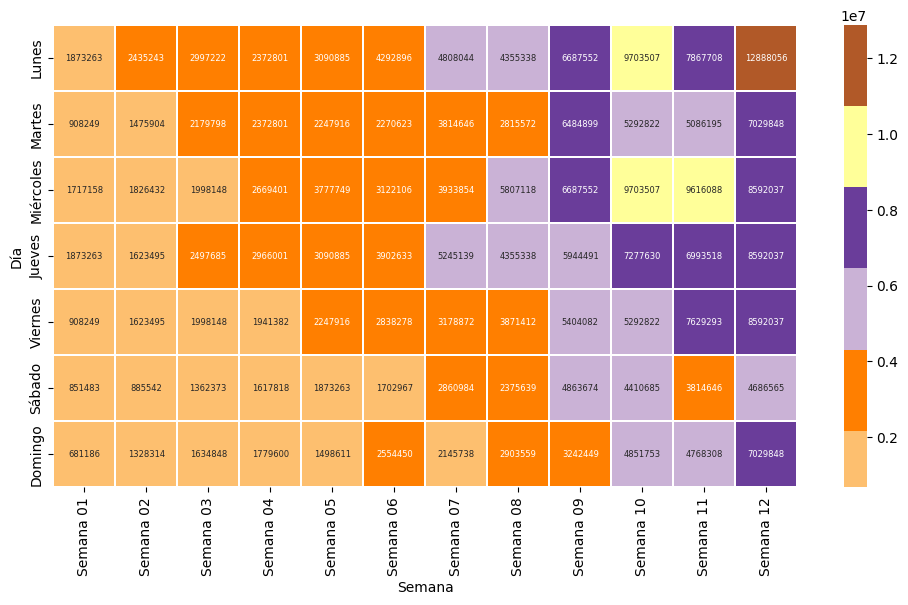

In [38]:
sns.heatmap(
    df_pivoteado,
    annot=True,
    fmt="d",
    annot_kws={'size': 6},
    cmap='Paired',
    linewidths=.10,
    center=200
    )

Mapa de calor Secuencial, donde no se aprecia con mucha claridad los diferentes valores

<Axes: xlabel='Semana', ylabel='Día'>

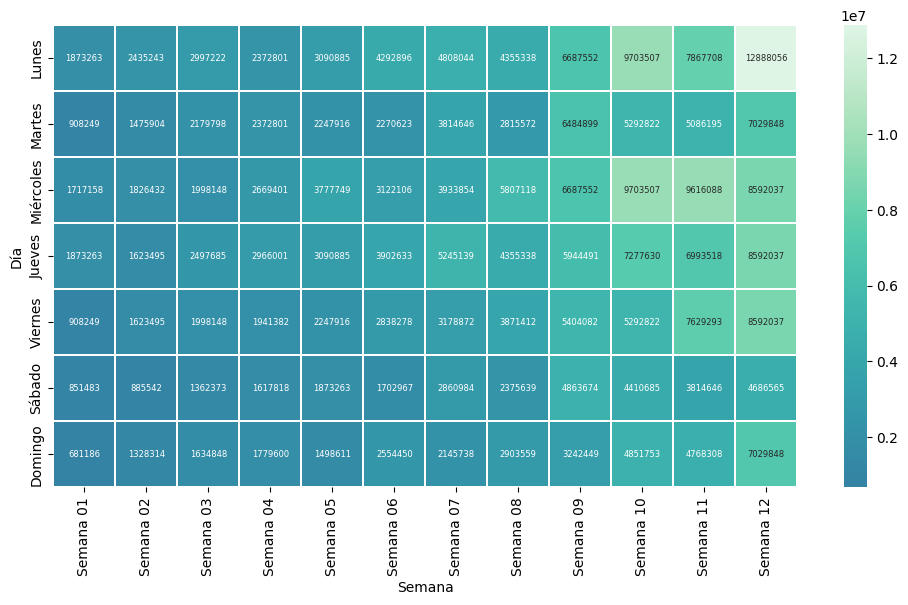

In [39]:
sns.heatmap(
    df_pivoteado,
    annot=True,
    fmt="d",
    annot_kws={'size': 6},
    cmap='mako',
    linewidths=.10,
    center=200
    )